<a href="https://colab.research.google.com/github/nihar-max/leanding_loan_club_defaulters_prediction/blob/master/%F0%9F%8F%A6_Lending_Club_Loan_%F0%9F%92%B0_Defaulters_%F0%9F%8F%83%E2%80%8D%E2%99%82_Prediction_Part_3_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import  seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X_train = pd.read_csv('/content/drive/MyDrive/lending club loans/X_train_oversampled.csv',
                  engine="python",
                  error_bad_lines=False,
                  encoding='utf-8')


X_test = pd.read_csv('/content/drive/MyDrive/lending club loans/X_test.csv',
                  engine="python",
                  error_bad_lines=False,
                  encoding='utf-8')


y_train = pd.read_csv('/content/drive/MyDrive/lending club loans/y_train_oversampled.csv',
                  engine="python",
                  error_bad_lines=False,
                  encoding='utf-8')


y_test = pd.read_csv('/content/drive/MyDrive/lending club loans/y_test.csv',
                  engine="python",
                  error_bad_lines=False,
                  encoding='utf-8')


<ipython-input-3-16aa86686bd8>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  X_train = pd.read_csv('/content/drive/MyDrive/lending club loans/X_train_oversampled.csv',
<ipython-input-3-16aa86686bd8>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  X_test = pd.read_csv('/content/drive/MyDrive/lending club loans/X_test.csv',
<ipython-input-3-16aa86686bd8>:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  y_train = pd.read_csv('/content/drive/MyDrive/lending club loans/y_train_oversampled.csv',
<ipython-input-3-16aa86686bd8>:19: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  y_test = pd.read_csv('/content/drive/My

In [4]:
X_train.drop('Unnamed: 0', axis=1, inplace=True)
y_train.drop('Unnamed: 0', axis=1, inplace=True)
X_test.drop('Unnamed: 0', axis=1, inplace=True)
y_test.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
print(' Total datapoints in X_train :',X_train.shape)
print(' Total datapoints in X_test :',X_test.shape)
print(' Total datapoints in y_train :',y_train.shape)
print(' Total datapoints in y_test :',y_test.shape)

 Total datapoints in X_train : (42819, 66)
 Total datapoints in X_test : (10507, 66)
 Total datapoints in y_train : (42819, 1)
 Total datapoints in y_test : (10507, 1)


# 9. Load Machine Learning Model

In [37]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## 1. Gaussian Naive Bayes

In [80]:
NBclassifier1 = GaussianNB()
NBclassifier1.fit(X_train, y_train)

y_pred_nb = NBclassifier1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Accuracy & Error

In [81]:
a1 = round(accuracy_score(y_test, y_pred_nb)*100,4)
a2 = round(100-accuracy_score(y_test, y_pred_nb)*100,4)
print('Accuracy:',a1)
print('Error:',a2)

Accuracy: 91.7103
Error: 8.2897


### Confusion Matrix

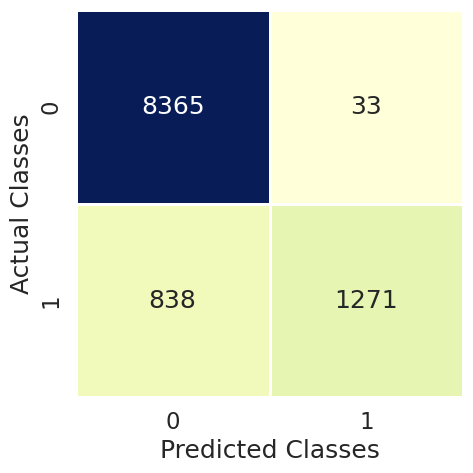

In [82]:
def confusion_mat(color):
    cof=confusion_matrix(y_test, y_pred_nb)
    cof=pd.DataFrame(cof, index=[i for i in range(1,3)], columns=[i for i in range(1,3)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(5,6));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=[0,1],yticklabels=[0,1]);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

confusion_mat('YlGnBu')

### Precision , Recall ,F1-Score

In [83]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_nb))


Classification Report

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      8398
           1       0.97      0.60      0.74      2109

    accuracy                           0.92     10507
   macro avg       0.94      0.80      0.85     10507
weighted avg       0.92      0.92      0.91     10507



- Precision : All points which are predicted to be positive out of that how many are actual positive

- Recall: All the Actual positive points out of that how many are Predicted positive


##  2. Logistic Regression

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [57]:
LRclassifier = LogisticRegression(penalty='l2',solver= 'liblinear', max_iter=500, random_state=1)
# L2 = L2 regularization helps to overcome (overfitting vs underfitting)
#libliner for binary classification
LRclassifier.fit(X_train, y_train)

y_pred_lr = LRclassifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Accuracy & Error

In [88]:
b1 = round(accuracy_score(y_test, y_pred_lr)*100,4)
b2 = round(100-accuracy_score(y_test, y_pred_lr)*100,4)
print('Accuracy:',b1)
print('Error:',b2)

Accuracy: 93.6519
Error: 6.3481


### Confusion Matrix

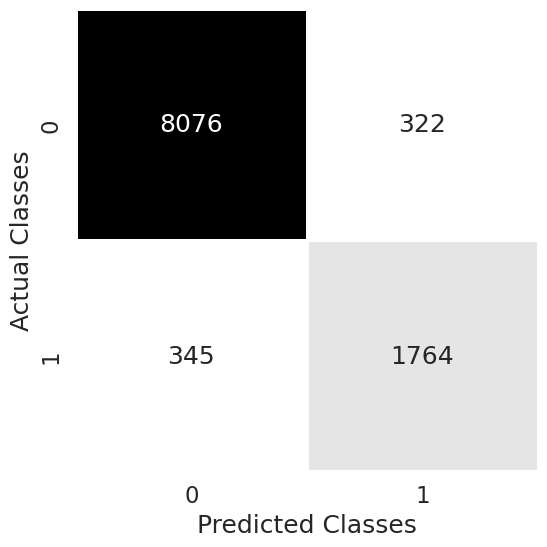

In [58]:
def confusion_mat(color):
    cof=confusion_matrix(y_test, y_pred_lr)
    cof=pd.DataFrame(cof, index=[i for i in range(1,3)], columns=[i for i in range(1,3)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(6,6));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=[0,1],yticklabels=[0,1]);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

confusion_mat('Greys')

### Precision ,Recall,F1-Score

In [60]:
print('\nClassification Report\n')
print((classification_report(y_test, y_pred_lr)))


Classification Report

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8398
           1       0.85      0.84      0.84      2109

    accuracy                           0.94     10507
   macro avg       0.90      0.90      0.90     10507
weighted avg       0.94      0.94      0.94     10507



## 3. Decision Tree

In [85]:
dt_model = DecisionTreeClassifier(criterion='gini')
dt_model.fit(X_train,y_train)
pred_dtg = dt_model.predict(X_test)

### Accuracy & Error

In [87]:
c1 = round(accuracy_score(y_test, pred_dtg)*100,4)
c2 = round(100-accuracy_score(y_test, pred_dtg)*100,4)
print('Accuracy:',c1)
print('Error:',c2)

Accuracy: 97.8395
Error: 2.1605


### Confusion Matrix

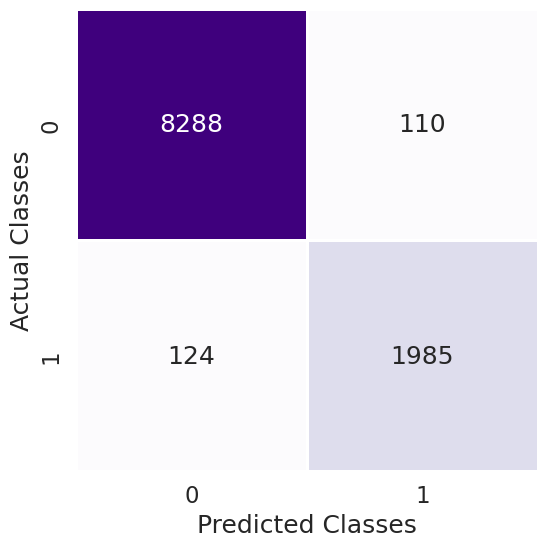

In [73]:
def confusion_mat(color):
    cof=confusion_matrix(y_test, pred_dtg)
    cof=pd.DataFrame(cof, index=[i for i in range(1,3)], columns=[i for i in range(1,3)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(6,6));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=[0,1],yticklabels=[0,1]);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

confusion_mat('Purples')

### Precision ,Recall,F1-Score

In [71]:
print('\nClassification Report\n')
print((classification_report(y_test, pred_dtg)))


Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8398
           1       0.95      0.94      0.94      2109

    accuracy                           0.98     10507
   macro avg       0.97      0.96      0.97     10507
weighted avg       0.98      0.98      0.98     10507



## 4. Random Forest Classifier using Hyper Parameter Tuning

In [8]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [1,3,4, 5, 7,9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [10]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_fore

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [11]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'gini'}

In [12]:
best_random_grid=rf_randomcv.best_estimator_

In [63]:

from sklearn.metrics import accuracy_score
y_pred_rf=best_random_grid.predict(X_test)


### Accuracy & Error

In [89]:
d1 = round(accuracy_score(y_test, y_pred_rf)*100,4)
d2 = round(100-accuracy_score(y_test, y_pred_rf)*100,4)
print('Accuracy:',d1)
print('Error:',d2)

Accuracy: 98.2298
Error: 1.7702


### Confusion Matrix

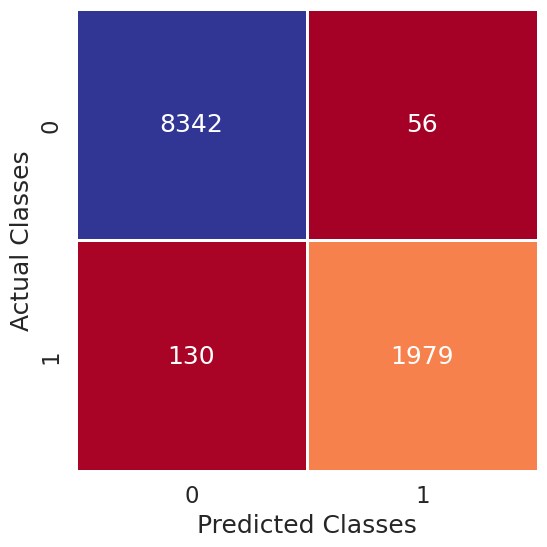

In [65]:
def confusion_mat(color):
    cof=confusion_matrix(y_test, y_pred_rf)
    cof=pd.DataFrame(cof, index=[i for i in range(1,3)], columns=[i for i in range(1,3)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(6,6));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=[0,1],yticklabels=[0,1]);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

confusion_mat('RdYlBu')

### Precision ,Recall,F1-Score

In [75]:
print('\nClassification Report\n')
print((classification_report(y_test, y_pred_rf)))


Classification Report

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8398
           1       0.97      0.94      0.96      2109

    accuracy                           0.98     10507
   macro avg       0.98      0.97      0.97     10507
weighted avg       0.98      0.98      0.98     10507



## Comparison of Accuracies of Different Models on (Dtest)

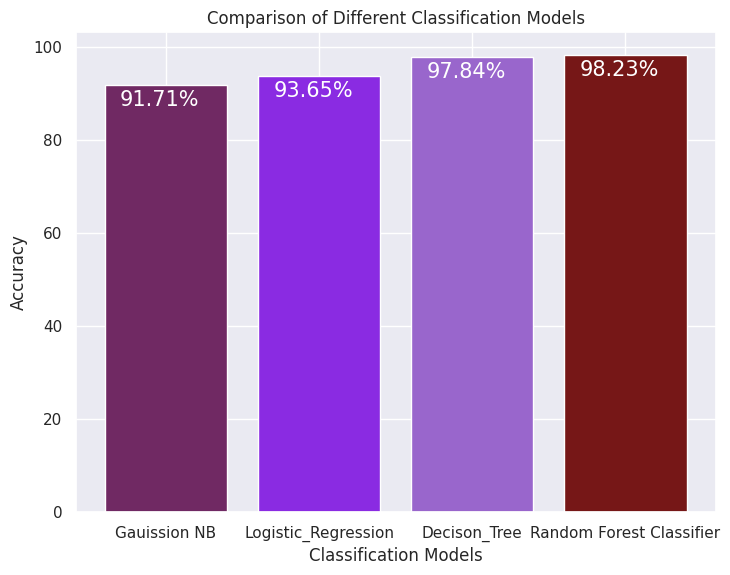

In [96]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ["Gauission NB","Logistic_Regression","Decison_Tree","Random Forest Classifier"]
Accuracy=[a1,b1,c1,d1]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc',"#761717"]);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-4.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');

plt.show();

### Conclusion & Buisness values

- So after loading the data we started with EDA process to understand the data through diffrent types of Univariate,Bivariate & Multivaiate tools and also handles outliers and NaN values.
- In feature engineering we have created some of the features as well as removed some unwanted features which added less value .
- Features such as Grade, Sub_Grade, Intreset rate, term etc etc played major roles to understand wheather the person is defaulter or not

### Machine Learning Models used
- Logistic
- Naive Bayes
- Decision Tree
- Random Forest Classifier

Finally we have compared all the models w.r.t.o their Acc, Confusion Matrix , Precison & Recall and all the models have performed better in this case
